## Image Processing Basics

- Corresponds to lecture 1

#### 🏛️ Image Processing

- Applying transformations on a given image

- Three broad categories for such transformations:
  
  1. Transformations (e.g., segmentation, border tracing, etc.)

  2. Preprocessing Transformations

  3. Feature Extraction Transformations

#### 🔮 Computer Vision

- Input is also an image

- Want to understand and infer something about it (i.e., classification, regression, etc.)

- Usually image processing + artificial intelligence

#### 📚 Libraries

- Most known libraries: `OpenCV` and `Scikit-Image`

- Both are mostly `image processing` libraries but do a little `computer vision` 
    - In general, use in conjunction with a machine learning library for `computer vision`

- `Scikit-Image` usually more **friendly** and may **cover more** algorithms (e.g., feature extractors)
- `Open-CV` less friendly but shown to be sometimes **faster**, better supports **realtime video** and has some end-to-end computer vision algorithms

#### 🟥🟩🟦 Image Structure

- It's just a matrix of pixels (e.g., a grid of `100x100` pixels)
   - Each pixel has numerical value(s) corresponding to its color
   - We don't see the pixels when there are a lot of them!

<img src="https://i.imgur.com/7gXfjAF.png" width="600" alt="https://d3i71xaburhd42.cloudfront.net/34a066f87def71128bc1bb8bf44c067f37d3205c/11-Figure11-1.png"/>

- There are three main types of images: binary, greyscale and colored.

<img src="https://www.researchgate.net/publication/344249310/figure/fig2/AS:935972338425861@1600164603821/Figure2-a-RGB-image-b-Gray-Scale-image-c-Binary-image.jpg">

- Colored images (most general) represent each pixel by three values (RGB) (e.g., each ranges from 0 to 255 representing the intensity of the color)
    - Recall Physics: `In light you can mix any colour using the three primaries:red, green and blue`

- Greyscale images: each pixel is one value (e.g., 0:black to 255:white) 

- Binary images: each pixel is either 0 or 1 (e.g., black and white)

Screen perfectly render the most general form by design:

<img src="https://jakubmarian.com/wp-content/uploads/2015/05/lcdrgb.jpg" width=400>

#### 📖 Reading Images

- OpenCV has `cv2.imread` and reads in BGR format.

type and shape: <class 'numpy.ndarray'> (892, 1080, 3)
[[[108  89 114]
  [108  89 114]]

 [[109  90 115]
  [109  90 115]]]


True

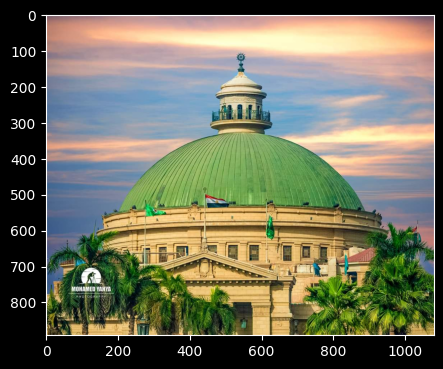

In [3]:
import cv2
import matplotlib.pyplot as plt

# Read Image
img = cv2.imread('./CU.jpeg')
print("type and shape:", type(img), img.shape)
print(img[:2, :2, :])                  # 2x2x3

# Plot with Matplotlib
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(5,5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))                         # cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Write the image after finishing
cv2.imwrite("finished_image.jpg", img)

- Scikit-Image has `skimage.io.imread` and reads in RGB format.

type and shape: <class 'numpy.ndarray'> (892, 1080, 3)
[[[114  89 108]
  [114  89 108]]

 [[115  90 109]
  [115  90 109]]]


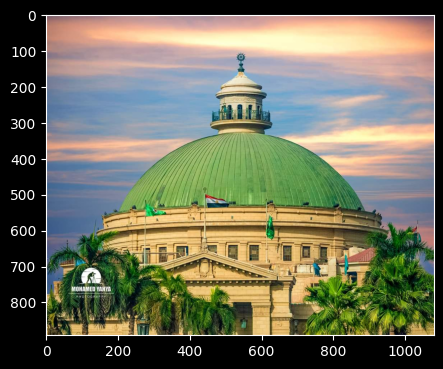

In [6]:
import skimage as ski

# Read Image
img = ski.io.imread('./CU.jpeg')
print("type and shape:", type(img), img.shape)
print(img[:2, :2, :])                  # 2x2x3

# Plot with Matplotlib
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(5,5))
plt.imshow(img)                        
plt.show()
# Write the image after finishing
ski.io.imsave("finished_image_ski.jpg", img)

- An image is just a Numpy array! Can perform many image operations on the image using it! (e.g., crop, greyscale, resize, paste, etc.)
- E.g., to crop: `image[y1:y2, x1:x2]`
- For resize, which deletes or interpolates pixels, use `ski.transform.resize(img, (new_height, new_width)` or `cv2.resize(src, (new_width, new_height))`

**Note on Image Formats:**
- `JPG` and `JPEG` are the same
- `PNG` represents each pixel with an extra alpha value for transparency (4D pixel) 
- `GIF` adds another dimension for multiple images
- All formats above assume colors in 0-255 range
- `TIFF` is a lossless format (no optimization/compression) and also supports the 0-1 range

**Note on Color Formats:**

- An alternative to RGB that can also represent all colors is HSV

<img src="https://i.stack.imgur.com/xjgXX.jpg">

In [ ]:
from skimage.color import rgb2hsv
hsv_img = rgb2hsv(img)          # cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV) for OpenCV

#### 🤔 Other Datastructures

- Image Pyramids are useful when further processing can depend on image size (e.g., classical object detection)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/Image_pyramid.svg/1200px-Image_pyramid.svg.png" width="300">

- Chain Codes to represent contour

<img src="https://ojskrede.github.io/inf4300/images/chain_code_connectivity.png">
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRjZDp4JYvjOxQ8PtE2eOcZ6DxGhEAkZ00qqudE_ygW6g&s">

- Trees to represent segmentation

<img src="https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-03-28-11-45-55.jpg">

#### 🪄 Feature Extraction

- Histogram is a 1D vector of shape 256D
- Records the number of pixels for each color

shapes are (256,) (256,)


Text(0, 0.5, 'count')

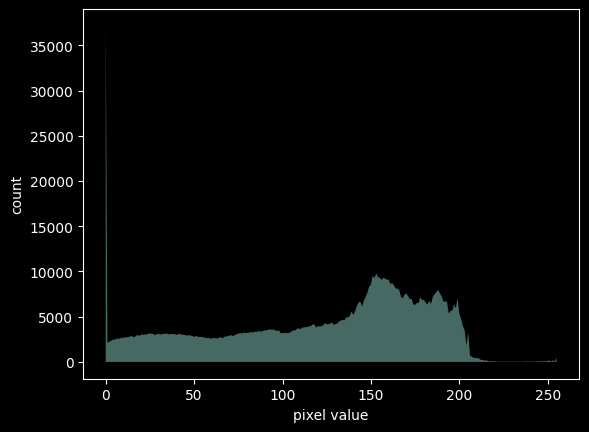

In [13]:
# Get the histogram data
hist, bins = ski.exposure.histogram(img[:,:,2])            # calcHist for OpenCV
print("shapes are", hist.shape, bins.shape)         # channel_axis=2

# Plot
plt.fill_between(bins, hist, alpha=0.5)
plt.xlabel('pixel value')
plt.ylabel('count')

- Comatrix (co-occurence matrix) is a `255x255` matrix
- `C[i,j]` has the number of times color `i` was in some way adjaced to color `j`
- E.g., `C[103, 25]` has the number of times a pixel with color `103` was in some way adjacent to a pixel of color `25`

<img src="https://www.researchgate.net/publication/273731213/figure/fig5/AS:667915284148224@1536254821063/Gray-level-co-occurrence-matrix-calculation-example-For-interpretation-of-the.png">

In [18]:
π = 3.14
comatrix = ski.feature.graycomatrix(img[:,:,0], distances=[1], angles=[0, π])
comatrix.shape

(256, 256, 1, 2)

Thease features may be localized if needed (computed on portions of the image)